In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/genderdetectionface/dataset1/train/woman/face_413.jpg
/kaggle/input/genderdetectionface/dataset1/train/woman/face_966.jpg
/kaggle/input/genderdetectionface/dataset1/train/woman/face_1210.jpg
/kaggle/input/genderdetectionface/dataset1/train/woman/face_732.jpg
/kaggle/input/genderdetectionface/dataset1/train/woman/face_814.jpg
/kaggle/input/genderdetectionface/dataset1/train/woman/face_1164.jpg
/kaggle/input/genderdetectionface/dataset1/train/woman/face_509.jpg
/kaggle/input/genderdetectionface/dataset1/train/woman/face_1258.jpg
/kaggle/input/genderdetectionface/dataset1/train/woman/face_1288.jpg
/kaggle/input/genderdetectionface/dataset1/train/woman/face_764.jpg
/kaggle/input/genderdetectionface/dataset1/train/woman/face_409.jpg
/kaggle/input/genderdetectionface/dataset1/train/woman/face_1118.jpg
/kaggle/input/genderdetectionface/dataset1/train/woman/face_1005.jpg
/kaggle/input/genderdetectionface/dataset1/train/woman/face_998.jpg
/kaggle/input/genderdetectionface/dataset1

/kaggle/input/genderdetectionface/dataset1/dataset1/train/woman/face_781.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/woman/face_749.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/woman/face_961.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/woman/face_656.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/woman/face_1377.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/woman/face_945.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/woman/face_1311.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/woman/face_756.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/woman/face_1158.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/woman/face_1359.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/woman/face_1111.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/woman/face_622.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/woman/face_57

/kaggle/input/genderdetectionface/dataset1/dataset1/train/man/face_528.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/man/face_650.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/man/face_547.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/man/face_532.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/man/face_925.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/man/face_936.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/man/face_1230.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/man/face_1199.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/man/face_1208.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/man/face_1001.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/man/face_892.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/man/face_1385.jpg
/kaggle/input/genderdetectionface/dataset1/dataset1/train/man/face_745.jpg
/kaggle/input/gender

In [112]:
import matplotlib.pyplot as plt
import matplotlib.image as image
import cv2 as cv
from sklearn import preprocessing

In [113]:
print(os.listdir("/kaggle/input"))
os.chdir("/kaggle/input/genderdetectionface/dataset1")
train,test,valid = os.listdir("dataset1")
women ,men= os.listdir('dataset1/{}'.format(valid))
men,women

['genderdetectionface']


('man', 'woman')

In [114]:
def read_image(image_path):
    img = cv.imread(image_path,cv.IMREAD_GRAYSCALE)
    img = cv.resize(img,(128,128))
    #plt.imshow(img)
    return np.array(img)
    
def prepare_data(train):
    image_data = []
    image_label = []
    for i in os.listdir("dataset1/{}".format(train)):
        for image_file in os.listdir("dataset1/{}/{}".format(train,i)):
            #print(i)
            image_path = "dataset1/{}/{}/{}".format(train,i,image_file)
            if i == "woman":
                image_data.append(read_image(image_path))
                image_label.append(0)
            if i == "man":
                image_data.append(read_image(image_path))
                image_label.append(1)
    return np.array(image_data),np.array(image_label)


In [115]:
x_train,y_train  = prepare_data(train)
x_test,y_test  = prepare_data(test)
x_valid,y_valid  = prepare_data(valid)


In [116]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_valid.shape,y_valid.shape


((1600, 128, 128), (1600,), (340, 128, 128), (340,), (340, 128, 128), (340,))

In [117]:
x_train = x_train.reshape(len(x_train),128*128)
x_test = x_test.reshape(len(x_test),128*128)
x_valid = x_valid.reshape(len(x_valid),128*128)


In [118]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)
x_valid = preprocessing.normalize(x_valid)


In [119]:
type(y_train)

numpy.ndarray

In [120]:
y_train[0]

0

In [121]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [122]:
model=MLPClassifier(verbose=True,hidden_layer_sizes=(400,400,400,),max_iter=40000)
model.fit(x_train,y_train)

Iteration 1, loss = 0.69169459
Iteration 2, loss = 0.63196554
Iteration 3, loss = 0.52179142
Iteration 4, loss = 0.46189672
Iteration 5, loss = 0.44307280
Iteration 6, loss = 0.42811743
Iteration 7, loss = 0.40856112
Iteration 8, loss = 0.38355521
Iteration 9, loss = 0.38029426
Iteration 10, loss = 0.37261505
Iteration 11, loss = 0.37633371
Iteration 12, loss = 0.36114893
Iteration 13, loss = 0.34942288
Iteration 14, loss = 0.34535458
Iteration 15, loss = 0.34667796
Iteration 16, loss = 0.35409679
Iteration 17, loss = 0.32970076
Iteration 18, loss = 0.32308620
Iteration 19, loss = 0.31130981
Iteration 20, loss = 0.29324137
Iteration 21, loss = 0.29947890
Iteration 22, loss = 0.31235672
Iteration 23, loss = 0.32187729
Iteration 24, loss = 0.30770523
Iteration 25, loss = 0.28320210
Iteration 26, loss = 0.28467041
Iteration 27, loss = 0.25575462
Iteration 28, loss = 0.25238169
Iteration 29, loss = 0.23854603
Iteration 30, loss = 0.24952982
Iteration 31, loss = 0.25360945
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(400, 400, 400), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=40000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

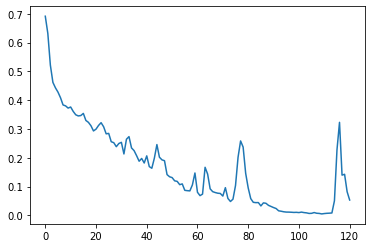

In [123]:
plt.plot(model.loss_curve_)

In [124]:
y_pre1=model.predict(x_valid)
y_pre2=model.predict(x_test)
y_ans=model.predict(x_train)

print('Valid: ',accuracy_score(y_valid,y_pre1))
print('Test: ',accuracy_score(y_test,y_pre2))
print('Train: ',accuracy_score(y_train,y_ans))

Valid:  0.8588235294117647
Test:  0.8441176470588235
Train:  0.989375


In [125]:
import joblib
joblib.dump(model,'/kaggle/working/gender_model.joblib')

['/kaggle/working/gender_model.joblib']

In [126]:
import pickle
a=open('/kaggle/working/Gender_model.pickle','wb')
pickle.dump(model,a)
a.close()